# Prosper Loan Data Exploration
## By Nada

# Preliminary Wrangling
This data set contains information on peer to peer loans facilitated by credit company Prosper

In [2]:
# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_csv('prosperLoanData.csv')
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


In [6]:
df.sample(10)

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
36550,84B13389120679351FD182C,141816,2007-05-23 10:34:54.053000000,B,36,Defaulted,2009-07-04 00:00:00,0.16105,0.1539,0.1389,...,-155.41,0.00,6026.33,6026.33,0.00,1.0,0,0,0.0,276
13672,17BC3418015737176E2ED5A,308707,2008-04-12 11:25:55.977000000,A,36,Completed,2011-04-20 00:00:00,0.19412,0.1795,0.1695,...,-167.64,0.00,0.00,0.00,0.00,1.0,0,0,0.0,222
14938,EAD13597801434020957E48,1100034,2013-12-20 08:45:06.343000000,NaN,36,Current,NaN,0.06726,0.0605,0.0505,...,-25.16,0.00,0.00,0.00,0.00,1.0,0,0,0.0,320
107383,D9063598394416951DC6604,1061098,2013-12-27 09:58:35.727000000,NaN,36,Current,NaN,0.29414,0.2554,0.2454,...,-6.41,0.00,0.00,0.00,0.00,1.0,0,0,0.0,3
88657,BECE353801321899076D687,555252,2012-01-30 20:40:21.333000000,NaN,36,Completed,2013-09-23 00:00:00,0.06828,0.0649,0.0549,...,-172.67,0.00,0.00,0.00,0.00,1.0,0,0,0.0,212
45954,3AAA3604240450046F7A16A,1185775,2014-02-26 16:01:35.430000000,NaN,60,Current,NaN,0.17710,0.1535,0.1435,...,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
105765,B62A3522587678783D6C9D7,518514,2011-07-26 20:13:19.860000000,NaN,36,Defaulted,2012-07-05 00:00:00,0.12400,0.1029,0.0929,...,-70.97,-945.00,5553.14,2541.43,473.29,1.0,0,0,0.0,114
81242,7CA0360177026193683A1C1,1193801,2014-02-14 08:52:56.377000000,NaN,36,Current,NaN,0.20255,0.1655,0.1555,...,0.00,0.00,0.00,0.00,0.00,1.0,0,0,0.0,1
101272,7650339369681013878F219,164090,2007-07-06 08:06:40.830000000,B,36,Defaulted,2010-02-24 00:00:00,0.15211,0.1450,0.1300,...,-121.29,-127.50,2521.48,0.00,280.72,1.0,0,0,0.0,129
39167,D78635734120740867FBEF7,725214,2013-03-08 17:58:00.660000000,NaN,60,Past Due (61-90 days),NaN,0.18136,0.1579,0.1479,...,-127.07,-387.54,0.00,0.00,0.00,1.0,0,0,0.0,395


Note that this data set contains 81 columns. For the purpose of this analysis I’ve took the following columns (variables):

In [7]:
target_columns =  [
    'Term', 'LoanStatus', 'BorrowerRate', 'ProsperRating (Alpha)', 'ListingCategory (numeric)', 'EmploymentStatus',
    'DelinquenciesLast7Years', 'StatedMonthlyIncome', 'TotalProsperLoans', 'LoanOriginalAmount',
    'LoanOriginationDate'
]

In [8]:
target_df = df[target_columns]

Since Prosper use their own proprietary Prosper Rating only since 2009, we have a lot of missing values in ProsperRating column. Let's drop these missing values:

In [10]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 11 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerRate               113937 non-null  float64
 3   ProsperRating (Alpha)      84853 non-null   object 
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   DelinquenciesLast7Years    112947 non-null  float64
 7   StatedMonthlyIncome        113937 non-null  float64
 8   TotalProsperLoans          22085 non-null   float64
 9   LoanOriginalAmount         113937 non-null  int64  
 10  LoanOriginationDate        113937 non-null  object 
dtypes: float64(4), int64(3), object(4)
memory usage: 9.6+ MB


In [14]:
target_df = target_df.dropna(subset=['ProsperRating (Alpha)']).reset_index()

Convert LoanOriginationDate to datetime datatype:

In [15]:
target_df['LoanOriginationDate'] = pd.to_datetime(target_df['LoanOriginationDate'])

In [16]:
target_df['TotalProsperLoans'] = target_df['TotalProsperLoans'].fillna(0)

In [17]:
target_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84853 entries, 0 to 84852
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   level_0                    84853 non-null  int64         
 1   index                      84853 non-null  int64         
 2   Term                       84853 non-null  int64         
 3   LoanStatus                 84853 non-null  object        
 4   BorrowerRate               84853 non-null  float64       
 5   ProsperRating (Alpha)      84853 non-null  object        
 6   ListingCategory (numeric)  84853 non-null  int64         
 7   EmploymentStatus           84853 non-null  object        
 8   DelinquenciesLast7Years    84853 non-null  float64       
 9   StatedMonthlyIncome        84853 non-null  float64       
 10  TotalProsperLoans          84853 non-null  float64       
 11  LoanOriginalAmount         84853 non-null  int64         
 12  Loan

### What is/are the main feature(s) of interest in your dataset?
> Trying to figure out what features can be used to predict default on credit. Also i would like to check what are major factors connected with prosper credit rating.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
> I think that the borrowers Prosper rating will have the highest impact on chances of default. Also I expect that loan amount will play a major role and maybe the category of credit. Prosper rating will depend on stated income and employment status.

## Univariate Exploration

###  Loan status

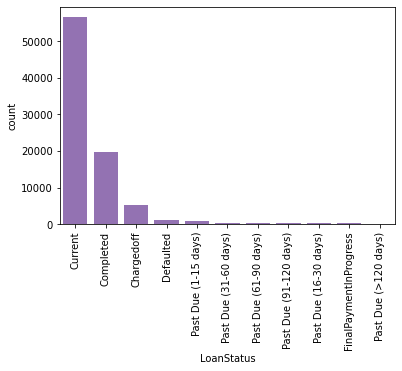

In [21]:
# setting color
base_color = sns.color_palette()[4]
plt.xticks(rotation=90)
f=target_df.LoanStatus.value_counts()
order=f.index
sns.countplot(data = target_df, x = 'LoanStatus',order=order ,color = base_color);

Observation 1: 
* Most of the loans in the data set are actually current loans. 
* Past due loans are split in several groups based on the length of payment delay.


### Employment Status

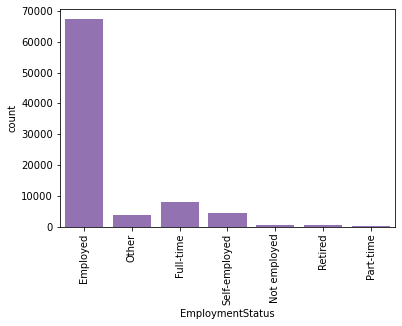

In [23]:
base_color = sns.color_palette()[4]

sns.countplot(data = target_df, x = 'EmploymentStatus', color = base_color);
plt.xticks(rotation = 90);

Observation 2: 
* The majority of borrowers are employed and all other categories as small part of borrowers. 
* In small Group full time has highest, after that self empolyed are there and so on.

### Stated Monthly Income

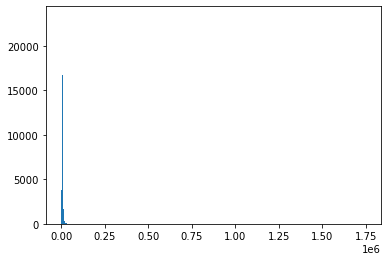

In [24]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);

(**Note**: Distribution of stated monthly income is highly skewed to the right. so, we have to check how many outliers are there)

In [25]:
income_std = target_df['StatedMonthlyIncome'].std()
income_mean = target_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(target_df[target_df['StatedMonthlyIncome'] >= boundary])

245

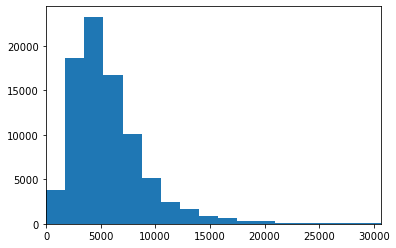

In [26]:
plt.hist(data=target_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary);

Observation 3:
* With a boundary of mean and 3 times standard deviations distribution of monthly income still has noticeable right skew but now we can see that mode is about 5000.  

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?
> Distribution of monthly stated income is very awkward: with a lot of outliers and very large range but still it was right skew. The majority of borrowers are employed and all other categories as small part of borrowers and most of the loans in the data set are actually current loans.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
> The majority of loans are actually current loans. Since our main goal is to define driving factors of outcome of loan we are not interested in any current loans.


## Bivariate Exploration

In [31]:
lisst_df = (target_df.LoanStatus == 'Completed') | (target_df.LoanStatus == 'Defaulted')| (target_df.LoanStatus =='Current') | (target_df.LoanStatus == 'Chargedoff')
target_df = target_df[lisst_df]
def change_(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
target_df['LoanStatus'] = target_df.apply(change_, axis=1)
target_df['LoanStatus'].value_counts()

Completed    19664
Defaulted     6341
Name: LoanStatus, dtype: int64

Variable Listing Category is set up as numeric and most of the values have very `low frequency`, for the easier visualization so we have change it to `categorical and reduce the number of categories`. 

### Status and Prosper Rating:

<AxesSubplot:xlabel='LoanStatus', ylabel='count'>

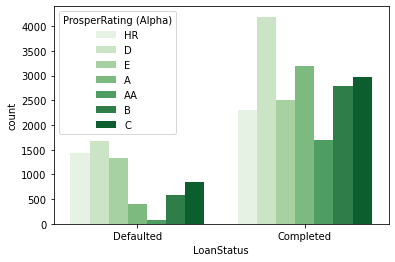

In [33]:
sns.countplot(data = target_df, x = 'LoanStatus', hue = 'ProsperRating (Alpha)', palette = 'Greens')

Observation 1:
* The `most frequent` rating among defaulted loans is actually `D`.
* And the `most frequent` rating among Completed is also` D `and second highest is A and so on.

###  Credit Start with Listing Category:

## Loan Status and Loan Amount

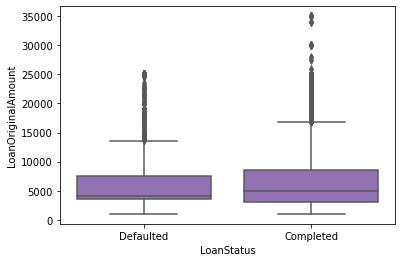

In [36]:
sns.boxplot(data = target_df, x = 'LoanStatus', y = 'LoanOriginalAmount', color = base_color);

Observation 3:
* As from Above Graph we can state that `defaulted credits` tend to be `smaller` than `completed credits` onces. 

## Prosper Rating and Employment Status

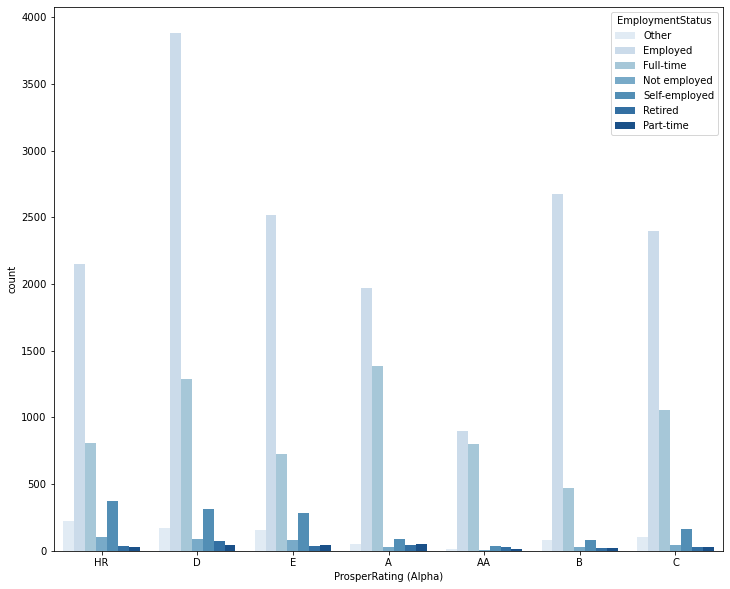

In [37]:
plt.figure(figsize = [12, 10])
sns.countplot(data = target_df, x = 'ProsperRating (Alpha)', hue = 'EmploymentStatus', palette = 'Blues');

Observation 4:
* Lower ratings seem to have greater proportions of individuals with employment status Not Employed, Self-employed, Retired and Part-Time. 

## Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?
> In Loan status vs Loan amount defaulted credits tend to be smaller than completed credits onces. Employment status of individuals with lower ratings tends to be 'Not employed', 'Self-employed', 'Retired' or 'Part-time'.


## Multivariate Exploration

## Rating, Loan Amount and Loan Status

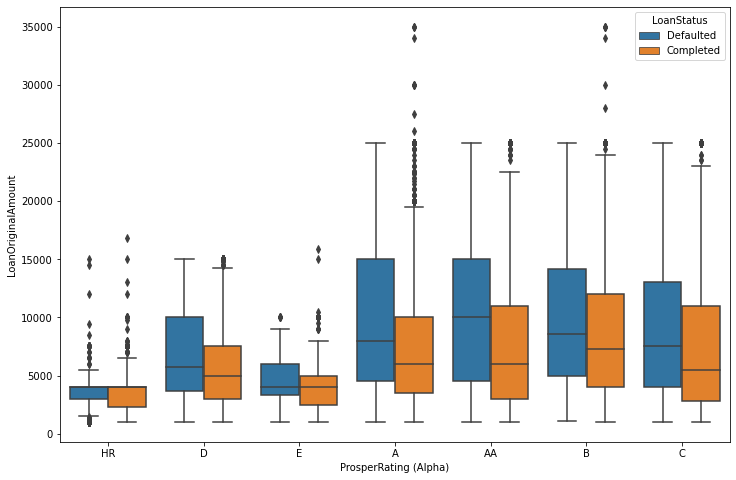

In [38]:
plt.figure(figsize = [12, 8])
sns.boxplot(data=target_df, x='ProsperRating (Alpha)', y='LoanOriginalAmount', hue='LoanStatus');

Observation 1:
* Except for the lowest ratings defaulted credits tend to be larger than completed.
* Most of the defaulted credits comes from individuals with low Prosper rating.

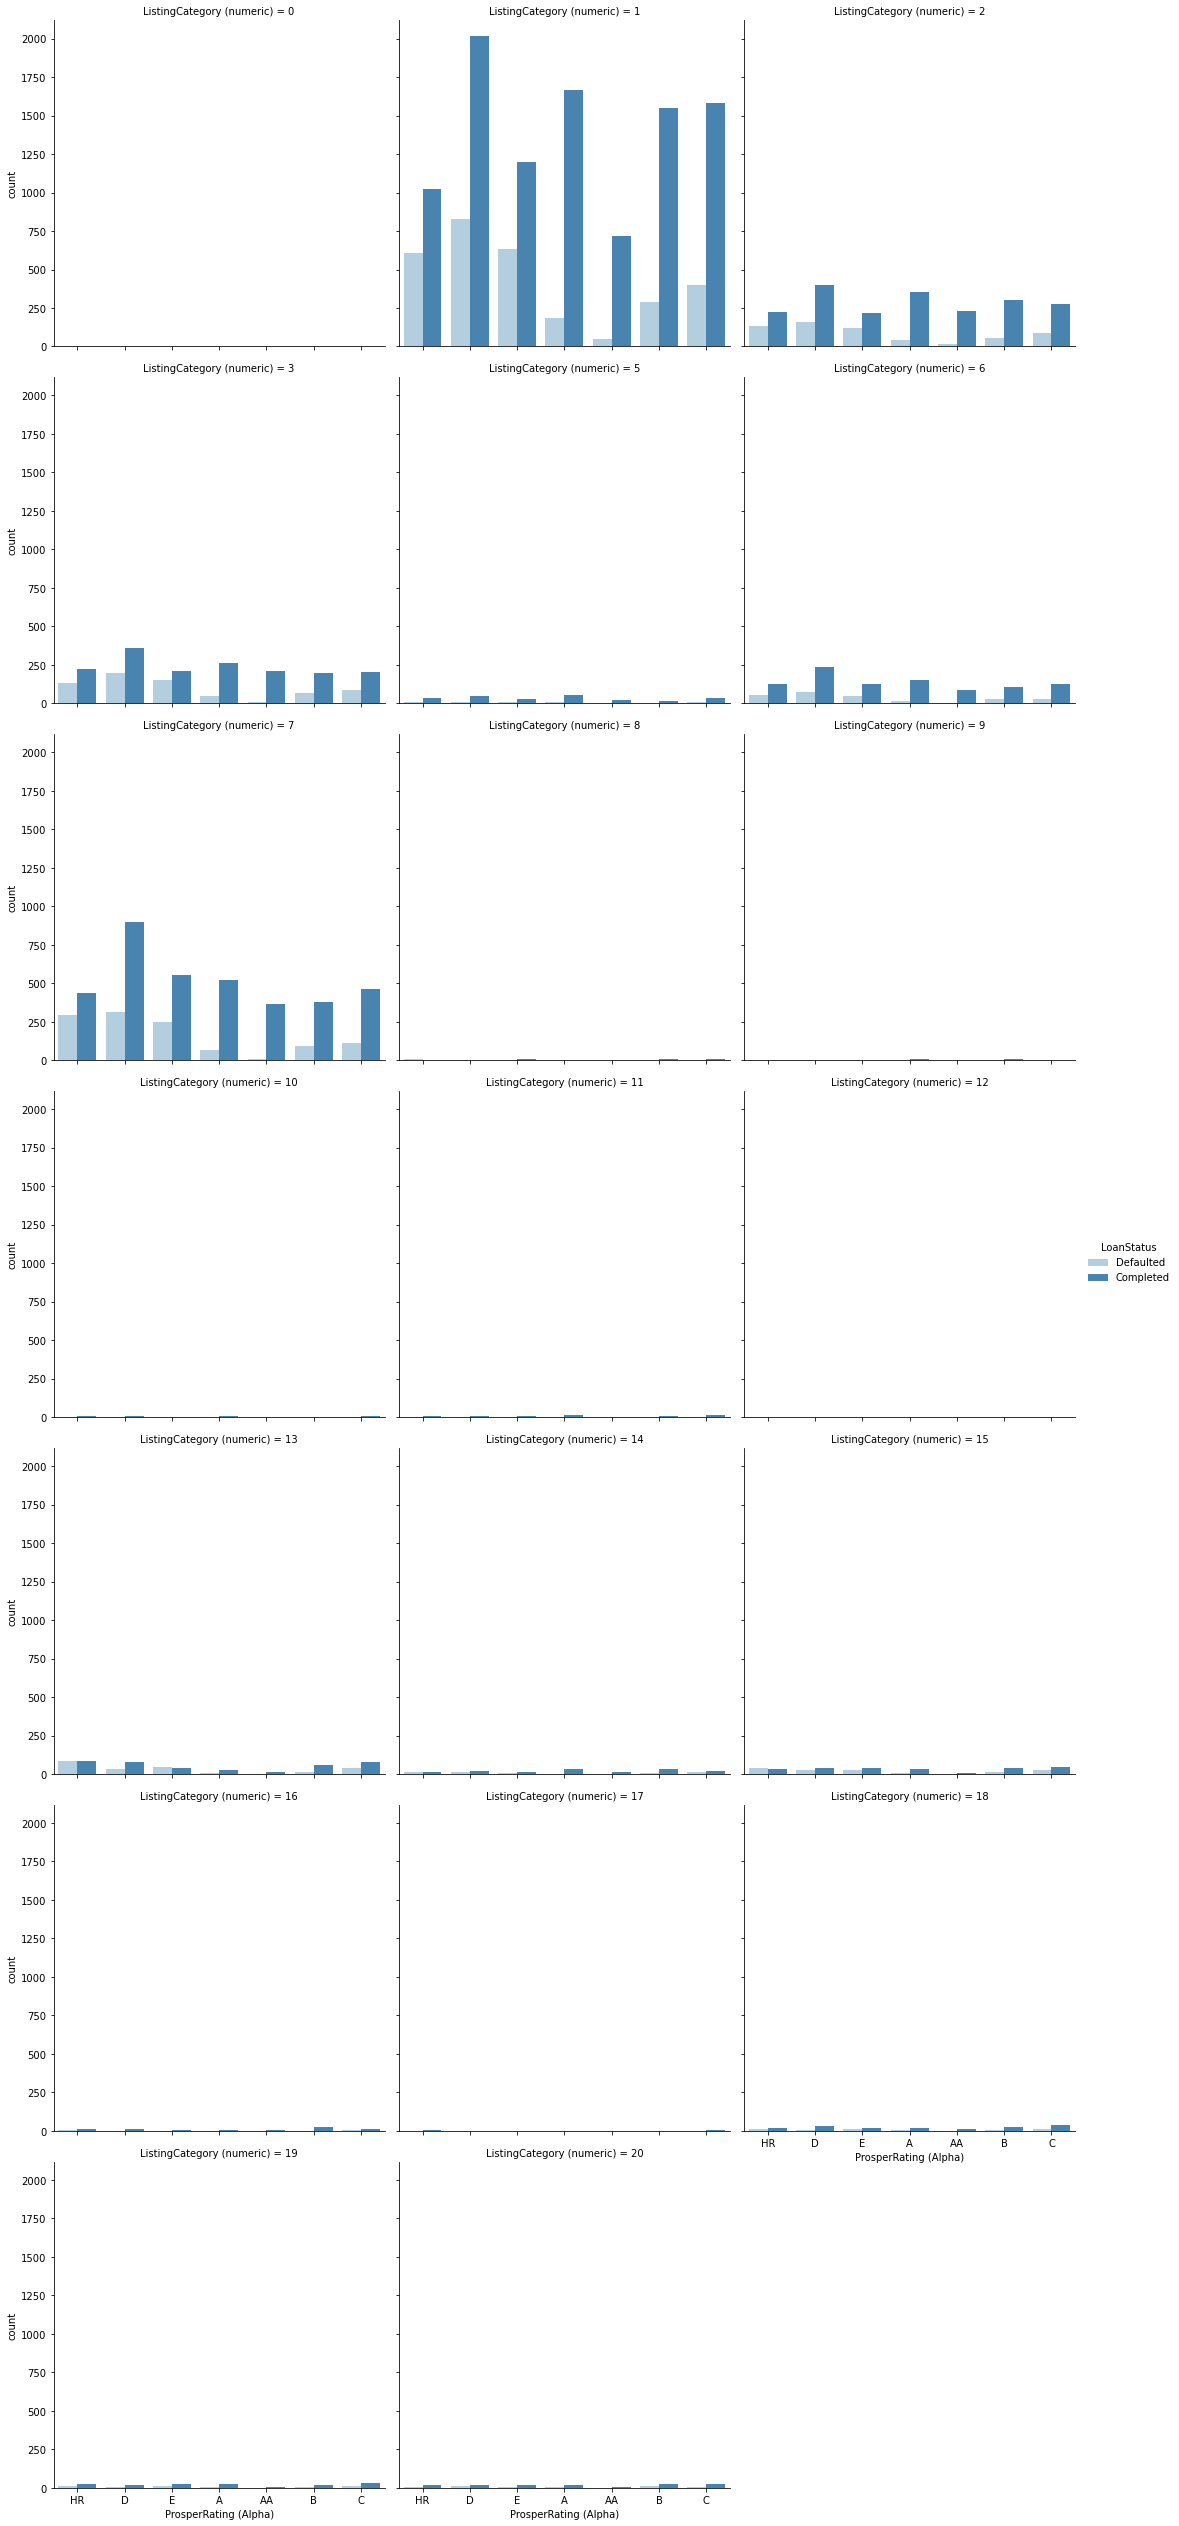

In [39]:
sns.catplot(x = 'ProsperRating (Alpha)', hue = 'LoanStatus', col = 'ListingCategory (numeric)',
              data = target_df, kind = 'count', palette = 'Blues', col_wrap = 3);

Observation 2:
* There are 5 graphs in the second one has much up and downs in it other than all of them.
* There is no substantial difference for default rates in different categories broken up by ratings.

##  Amount, Listing Category Loan and Loan Status Interact

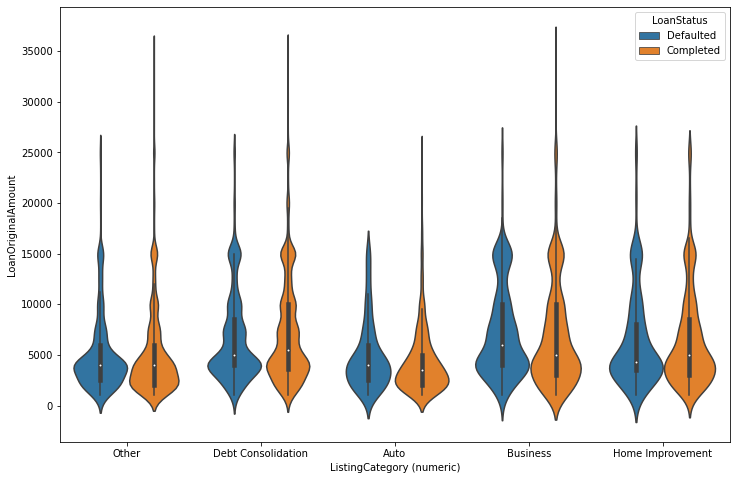

In [53]:
plt.figure(figsize = [12, 8])
sns.violinplot(data=target_df, x='ListingCategory (numeric)', y='LoanOriginalAmount', hue='LoanStatus');

Observation 3:
*  Except for Auto, Business and Home Improvemrnt dont have nearly equal mean amoong all of them.
*  Business category tend to have larger amount.

## Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?
> Our initial assumptions were strengthened. Most of the defaulted credits comes from individuals with low Prosper rating and Business category tend to have larger amount.

